# Ellipsoid Model with Uniform Perturbation Kernel
## Singular observed datapoint


In [1]:
import os
import numpy as np

from abcsmc.abcsmc import abcsmc
from abcsmc.models import EllipsoidModel
from abcsmc.priors import UniformPrior
import abcsmc.pl as pl


In [2]:
# ABC-SMC parameters
KERNEL_METHOD = 'uniform'
NPARTICLES = 1000
NITERS = 5
EPS0 = 5
EPS_PERCENTILE = 0.15

# Image output
imgdir = "../../out/images/nb_ellipse_uniform_singleton"
os.makedirs(imgdir, exist_ok=True)

### Generate observed data $X_0$


In [3]:
# Observed data
# data = np.array([10])
data = np.array([0])

ndraws = len(data)

# Parameter indices and names used for plotting
pidx1 = 0
pidx2 = 1
pname1 = "$\\theta_1$"
pname2 = "$\\theta_2$"

# Priors
prior_theta1 = UniformPrior(-20, 20)
prior_theta2 = UniformPrior(-20, 20)
prior_list = [prior_theta1, prior_theta2]
plot_range = [[-20, 20], [-20, 20]]

# Model object
var_const = 1
model = EllipsoidModel(0, 0, var=var_const, ndraws=ndraws)

# Simulation function
def f_sim(particle):
    m = EllipsoidModel(particle[0], particle[1], var=var_const)
    return m.generate_data(ndraws)

# Distance function
def f_dist(x):
    d = np.linalg.norm(x - data)
    assert np.ndim(d) == 0, "Bad distance function"
    return d


### Plot Analytic Posterior

Observed data D
 [0]


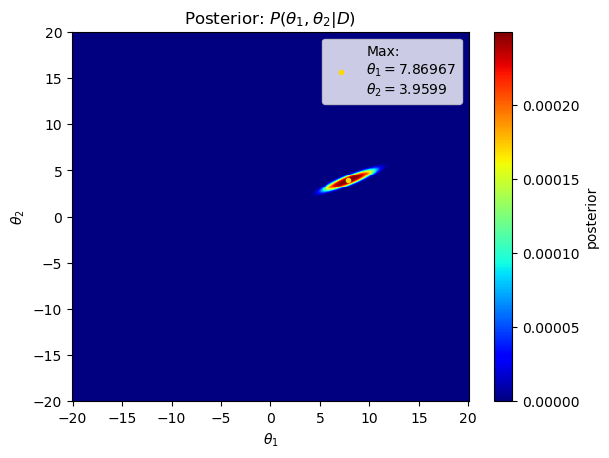

In [4]:
logposterior = False
pl.plot_posterior(
    model, data, prior_list,
    gridn=400,
    xlims=plot_range[0], ylims=plot_range[1],
    pname1=pname1, pname2=pname2,
    logposterior=logposterior,
    saveas=f"{imgdir}/analytic_posterior_plot.png",
    markersize=3,
)

print("Observed data D\n", data)

## Run ABC-SMC

In [5]:
particles, weights, results_dict = abcsmc(
    nparticles=NPARTICLES, 
    nparams=2, 
    prior_list=prior_list, 
    niters=NITERS,
    sim_func=f_sim,
    dist_func=f_dist, 
    eps0=EPS0, 
    eps_percentile=EPS_PERCENTILE, 
    min_eps=0, 
    kernel_method=KERNEL_METHOD,
    track_all_perturbations = True,
)


Running ABC-SMC...


Iteration:   0%|          | 0/5 [00:00<?, ?it/s]

Current count [Iter 0]:   0%|          | 0/1000 [00:00<?, ?it/s]

Epsilon: 5
Iter 0 finished in 3.59 secs
Epsilon: 0.7062
Iter 1 finished in 2.31 secs
Epsilon: 0.0976
Iter 2 finished in 7.99 secs
Epsilon: 0.01244
Iter 3 finished in 52.9 secs
Epsilon: 0.001945
Iter 4 finished in 344 secs


In [6]:
particle_history = results_dict['particle_history']
weight_history = results_dict['weight_history']
score_history = results_dict['score_history']
acceptance_rates = results_dict['acceptance_rates']
epsilon_history = results_dict['epsilon_history']
sampling_idx_history = results_dict['sampling_index_history']
particle_idx_history = results_dict['particle_index_history']
all_particle_history = results_dict['all_particle_history']
all_sampling_idx_history = results_dict['all_sampling_index_history']
all_particle_acceptance_history = results_dict['all_particle_acceptance_history']

## Plot results

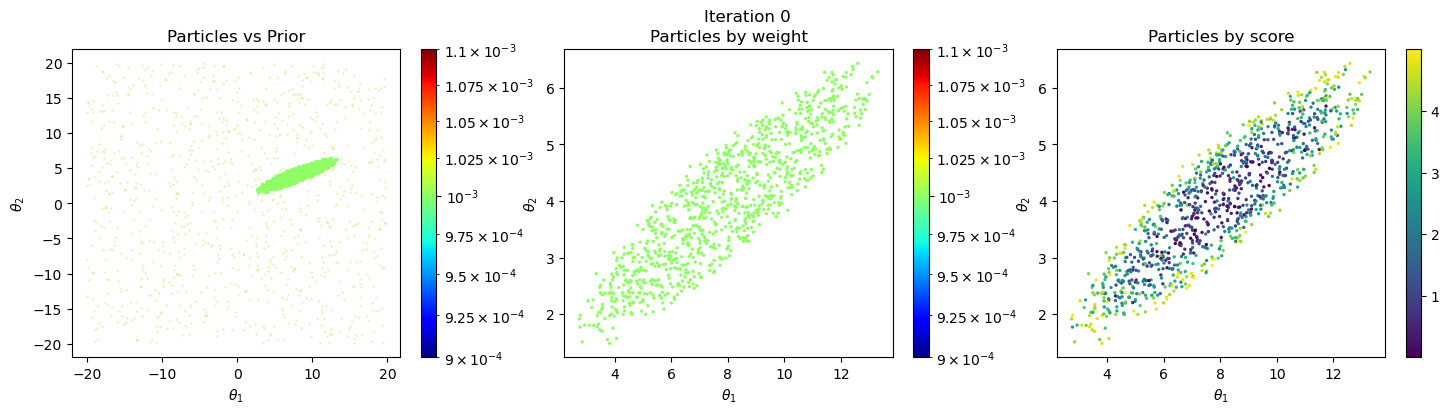

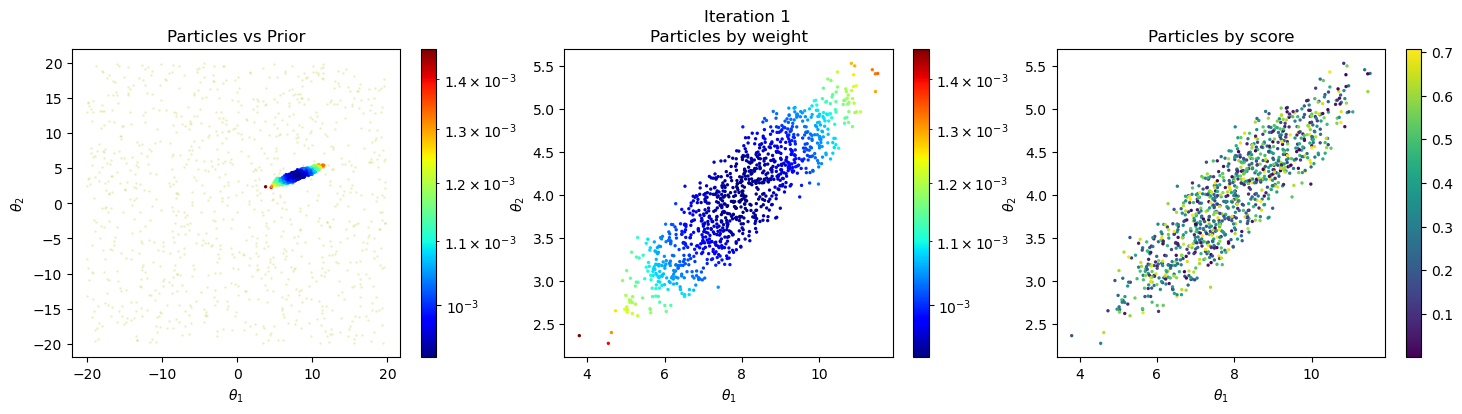

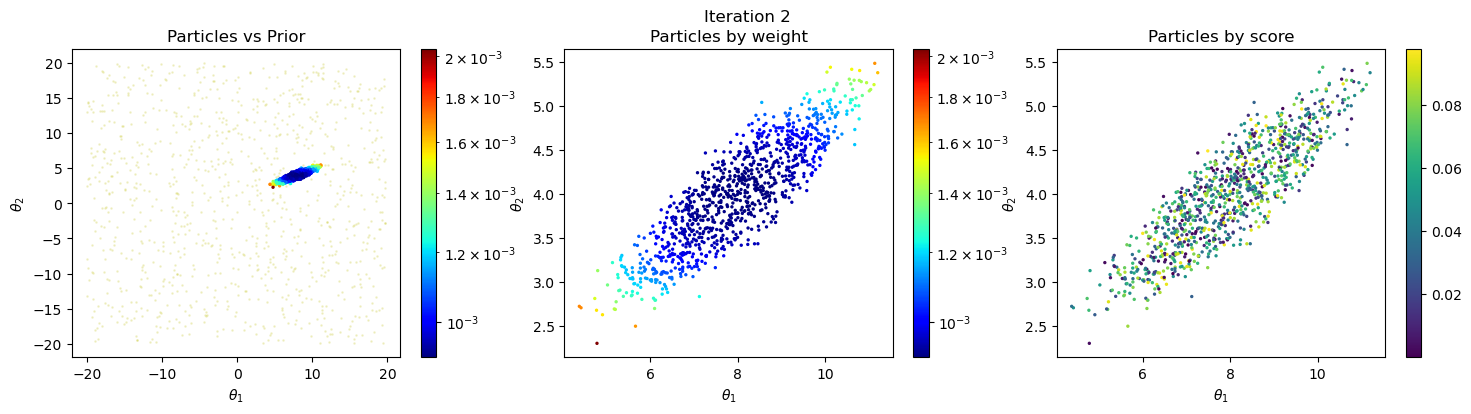

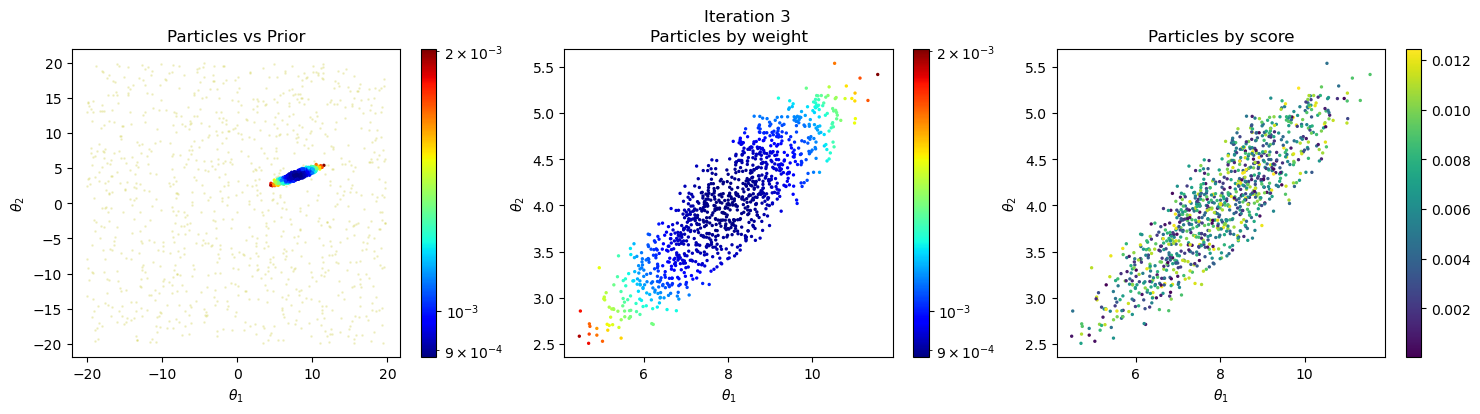

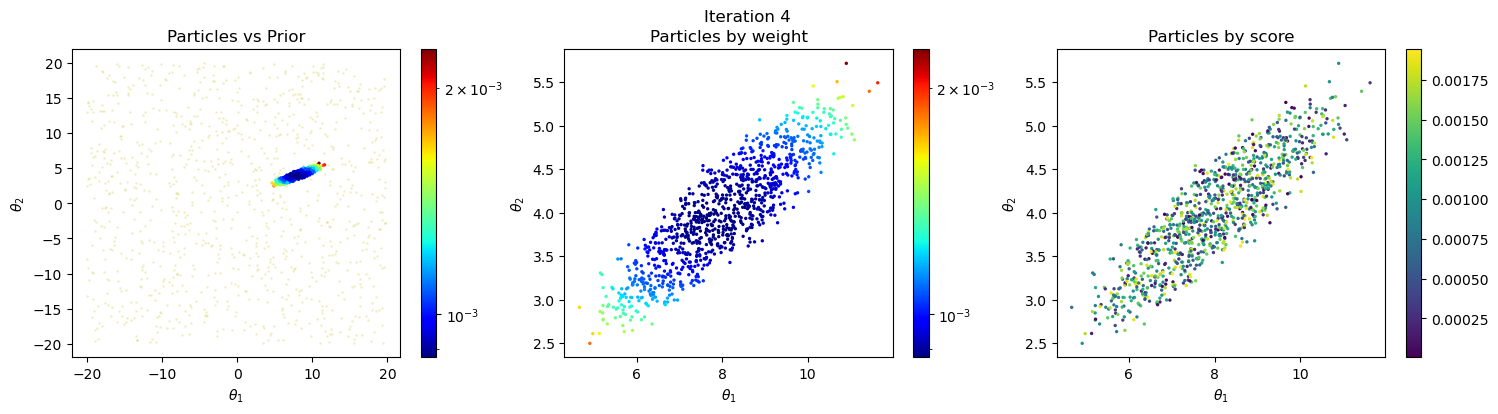

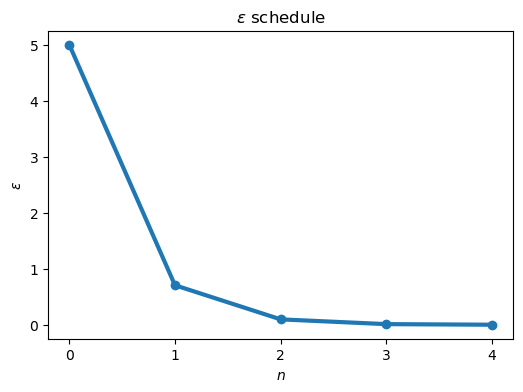

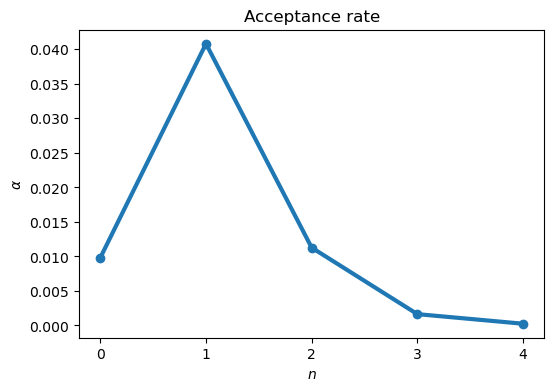

In [7]:
pl.plot_results(
    particle_history, weight_history, score_history, acceptance_rates,
    epsilon_history, prior_list, 
    pname1=pname1, pname2=pname2,
    save=True, imgdir=imgdir
)

## Perturbations

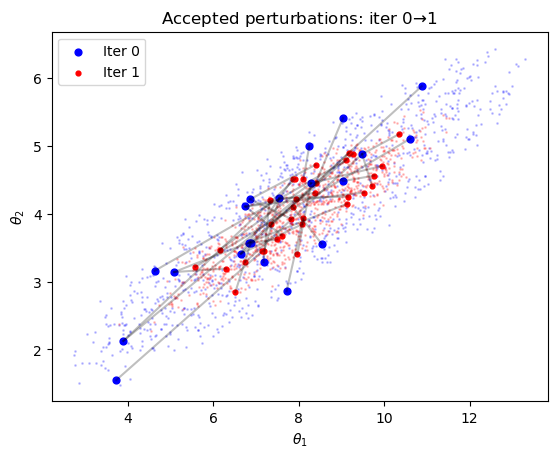

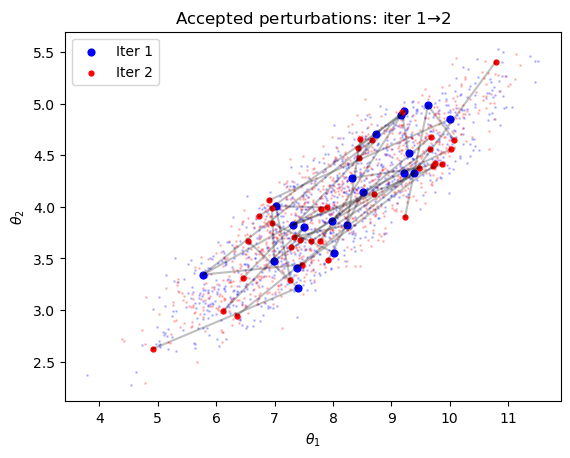

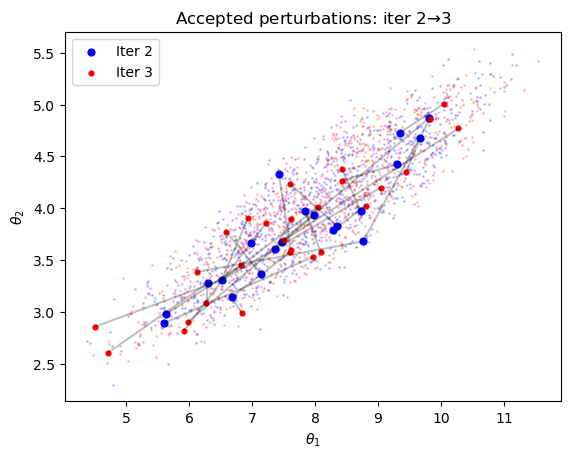

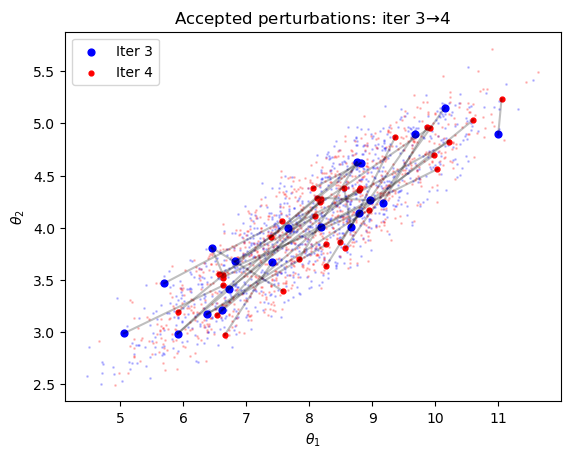

In [8]:
N_PERTRUB_SAMP = 20
for iteridx in range(len(particle_history) - 1):
    pl.plot_perturbation_sample(
        iteridx, particle_history, sampling_idx_history, particle_idx_history, 
        nsamp=N_PERTRUB_SAMP, 
        pname1=pname1, pname2=pname2,
        imgdir=imgdir, 
        saveas=f"perturbation_{iteridx}_{iteridx+1}.png"
    )

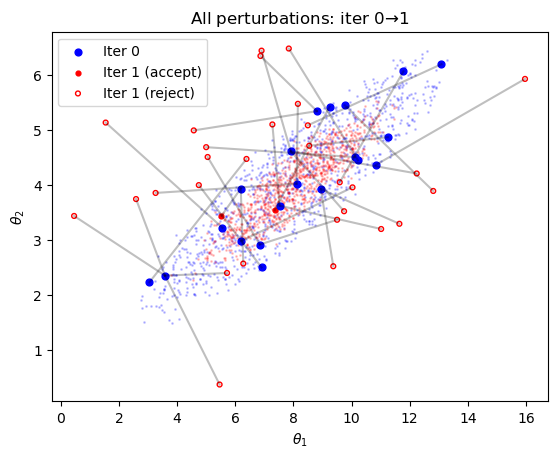

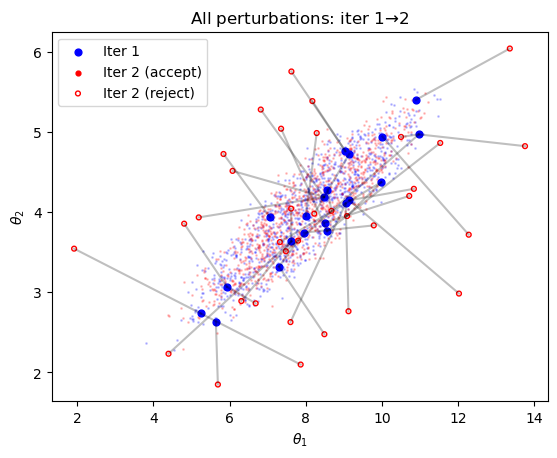

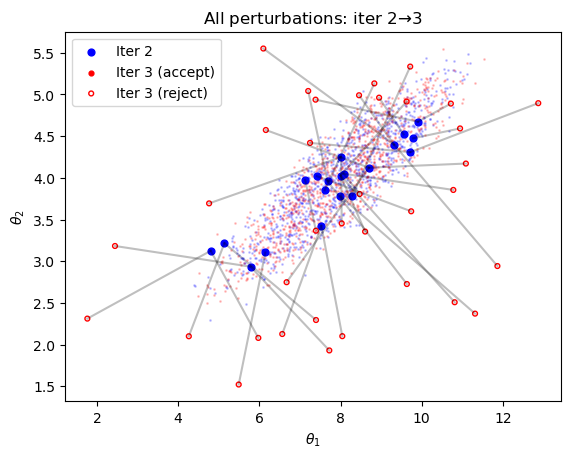

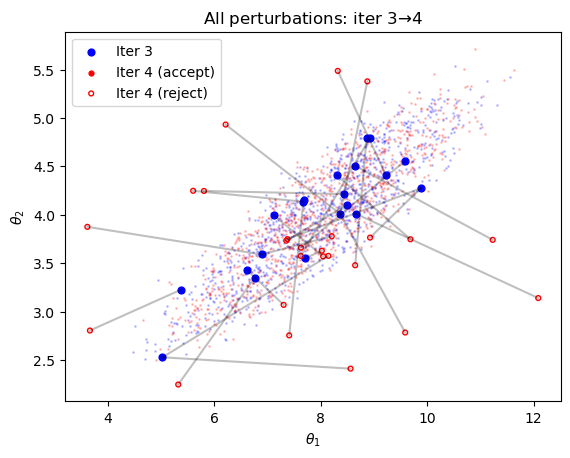

In [9]:
N_PERTRUB_SAMP = 20

for iteridx in range(len(particle_history) - 1):
    pl.plot_all_perturbation_sample(
        iteridx, particle_history, sampling_idx_history, particle_idx_history, 
        all_particle_history, all_sampling_idx_history, 
        acceptance_history=all_particle_acceptance_history,
        nsamp=N_PERTRUB_SAMP, 
        pname1=pname1, pname2=pname2,
        imgdir=imgdir, 
        saveas=f"perturbation_{iteridx}_{iteridx+1}.png"
    )

### Compare analytic and empirical posteriors

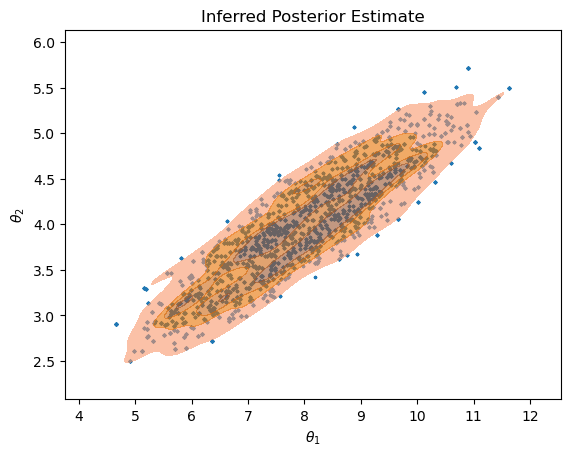

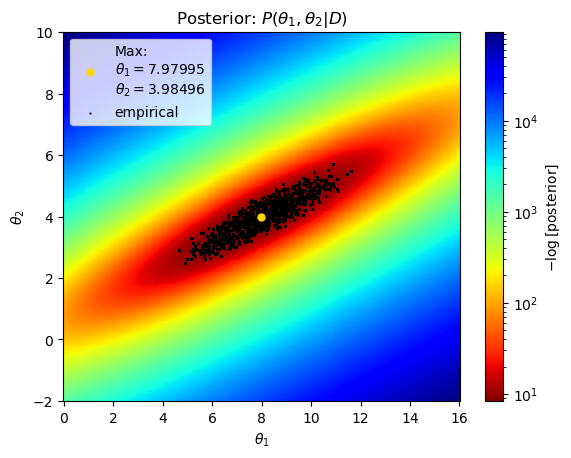

In [10]:
emp_dist = pl.plot_empirical_posterior(
    particles, weights,
    nsamps=10000,
    pname1=pname1, pname2=pname2,
    saveas=f"{imgdir}/empirical_posterior.png"
)

pl.plot_posterior(
    model, data, prior_list,
    gridn=400,
    # xlims=plot_range[0], ylims=plot_range[1],
    xlims=[0, 16], ylims=[-2, 10],
    pname1=pname1, pname2=pname2,
    logposterior=True,
    empirical_dist=emp_dist,
    # empirical_dist=emp_dist[0:100],
    saveas=f"{imgdir}/posterior_comparison.png",
    legend_loc='upper left'
)